# **Computational and Numerical Methods Lab-09**
# **Abhimanyu Karia: 202201435**
# **Devarshi Patel: 202201447**



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd

In [3]:
class differentiation:
    def forward_difference(self,f_exp,x,val,h=0.1):
        func = sp.lambdify(x,f_exp)
        if h == 0:
            h = 1e-7
        return (func(val+h) - func(val))/h

    def backward_difference(self,f_exp,x,val,h=0.1):
        func = sp.lambdify(x,f_exp)
        if h == 0:
            h = 1e-7
        return (func(val) - func(val-h))/h

    def central_difference(self,f_exp,x,val,h=0.1):
        func = sp.lambdify(x,f_exp)
        if h == 0:
            h = 1e-7
        return (func(val+h) - func(val-h))/(2*h)
    def true_derivative(self,f_exp,x,val):
        d_exp = sp.diff(f_exp,x)
        dfun = sp.lambdify(x,d_exp)
        return dfun(val)

**Q1) Given a function f(x)=e$^x$ , use the forward difference formula to estimate f′(1)
with step sizes h=0.1 to h=0.0001. Compare your results with the analytical
derivative. Plot the error with h.**

**Forward Difference**

- The forward difference of a function f(x) is given by:<br>
 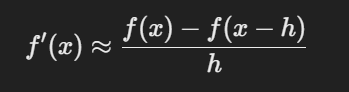

True Derivative at the point x = 1 = 2.718281828459045


,Step Size,Derivative Value,Error
0,0.0001,2.718418,0.000136
1,0.0002,2.718554,0.000272
2,0.0003,2.718690,0.000408
3,0.0004,2.718826,0.000544
4,0.0005,2.718962,0.000680
...,...,...,...
995,0.0996,2.858261,0.139979
996,0.0997,2.858406,0.140124
997,0.0998,2.858551,0.140269
998,0.0999,2.858697,0.140415


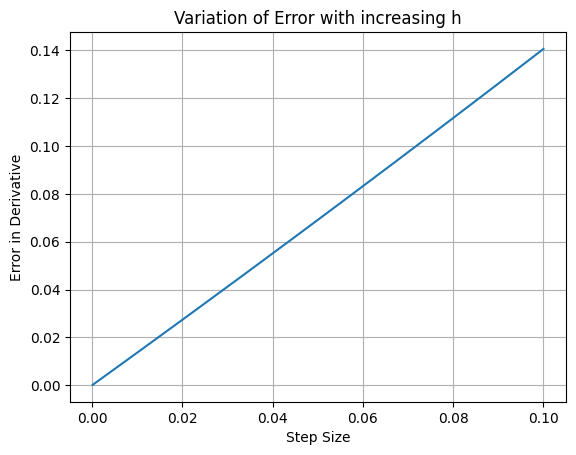

In [4]:
x = sp.symbols('x')
f_exp = sp.exp(x)
val = 1
diff = differentiation()
true_diff = diff.true_derivative(f_exp,x,1)
h = np.arange(0.0001,0.1001,0.0001)
forward_d = []
error = []
data = []
for h_val in h:
    f_diff = diff.forward_difference(f_exp,x,val,h=h_val)
    forward_d.append(f_diff)
    error.append(abs(f_diff - true_diff))
    data.append([h_val,f_diff,abs(f_diff-true_diff)])
print('True Derivative at the point x = 1 =',true_diff)
df = pd.DataFrame(data,columns = ['Step Size','Derivative Value','Error'])
display(df)
plt.plot(h,error)
plt.xlabel('Step Size')
plt.ylabel('Error in Derivative')
plt.title('Variation of Error with increasing h')
plt.grid(True)
plt.show()


**Q2) Using the function f(x)=sin(x), apply the backward difference method to
estimate f′(1.5) for h=0.5 to h=0.000005. Compare your answer to the exact
derivative. Plot the error with h.**

**Backward Difference**
- Backward difference of a function f(x) is given by: <br>
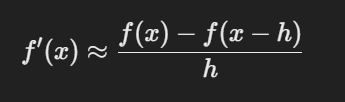

True Derivative at the point x = 1.5 = 0.0707372016677029


,Step Size,Derivative Value,Error
0,0.000005,0.070740,0.000002
1,0.000010,0.070742,0.000005
2,0.000015,0.070745,0.000007
3,0.000020,0.070747,0.000010
4,0.000025,0.070750,0.000012
...,...,...,...
99995,0.499980,0.312039,0.241302
99996,0.499985,0.312041,0.241304
99997,0.499990,0.312043,0.241306
99998,0.499995,0.312046,0.241309


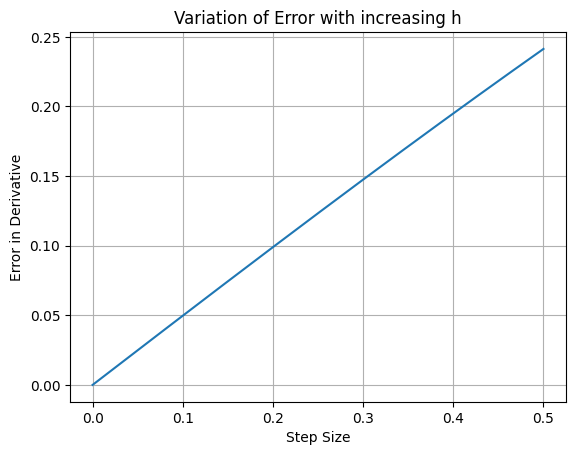

In [6]:
x = sp.symbols('x')
f_exp = sp.sin(x)
val = 1.5
diff = differentiation()
true_diff = diff.true_derivative(f_exp,x,val)
h = np.arange(0.000005,0.500005,0.000005)
backward_d = []
error = []
data = []
for h_val in h:
    b_diff = diff.backward_difference(f_exp,x,val,h=h_val)
    backward_d.append(b_diff)
    error.append(abs(b_diff - true_diff))
    data.append([h_val,b_diff,abs(b_diff-true_diff)])
print('True Derivative at the point x =',val,'=',true_diff)
df = pd.DataFrame(data,columns = ['Step Size','Derivative Value','Error'])
display(df)
plt.plot(h,error)
plt.xlabel('Step Size')
plt.ylabel('Error in Derivative')
plt.title('Variation of Error with increasing h')
plt.grid(True)
plt.show()


**Q3) For f(x)=ln(x), use the central difference approximation to
calculate f′(2) for h=0.1. Compare the results with the actual derivative.**

**Central Difference**
- Central difference of a function f(x) is given by: <br>
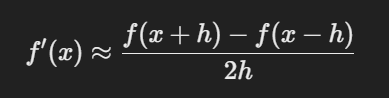

True Derivative at the point x = 2 = 0.5
Central Difference for h = 0.1 is : 0.5004172927849132
Error for h = 0.1 is 0.00041729278491320354


,Step Size,Derivative Value,Error
0,0.001,0.500000,4.166662e-08
1,0.002,0.500000,1.666668e-07
2,0.003,0.500000,3.750005e-07
3,0.004,0.500001,6.666683e-07
4,0.005,0.500001,1.041671e-06
...,...,...,...
95,0.096,0.500385,3.845317e-04
96,0.097,0.500393,3.925959e-04
97,0.098,0.500401,4.007441e-04
98,0.099,0.500409,4.089764e-04


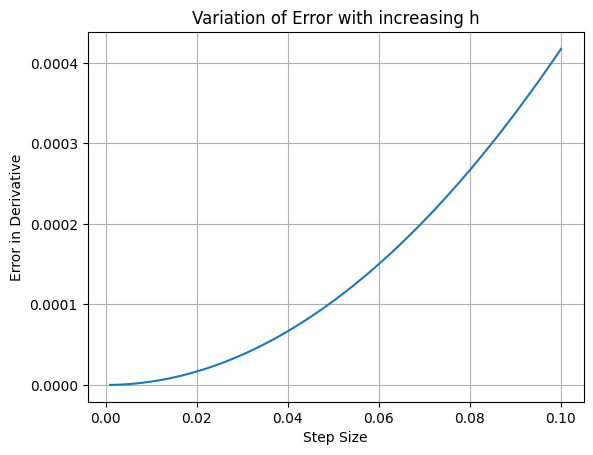

In [9]:
x = sp.symbols('x')
f_exp = sp.log(x)
val = 2
diff = differentiation()
true_diff = diff.true_derivative(f_exp,x,val)
h = np.arange(0.001,0.101,0.001)
central_d = []
error = []
data = []
for h_val in h:
    c_diff = diff.central_difference(f_exp,x,val,h=h_val)
    central_d.append(c_diff)
    error.append(abs(c_diff - true_diff))
    data.append([h_val,c_diff,abs(c_diff-true_diff)])
print('True Derivative at the point x =',val,'=',true_diff)
print('Central Difference for h = 0.1 is :',central_d[-1])
print('Error for h = 0.1 is',abs(central_d[-1] - true_diff))
df = pd.DataFrame(data,columns = ['Step Size','Derivative Value','Error'])
display(df)
plt.plot(h,error)
plt.xlabel('Step Size')
plt.ylabel('Error in Derivative')
plt.title('Variation of Error with increasing h')
plt.grid(True)
plt.show()

**Q4) Use the method of undetermined coefficient method to estimate the second
derivative of f(x)=x$^3$ at x=1 with h=0.1. How does the result
compare to the exact second derivative?**

**Method of undetermined coefficient**
- Consider f"(x) ≈ Af(x+h)+ Bf(x)+ Cf(x-h)
- expand f(x+h) and f(x-h) using taylor series.
- substitute those values in the above equation and compare coefficients
- Final equation: <br>
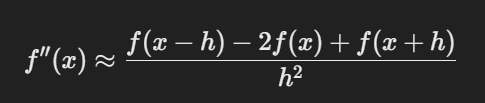


In [10]:
import sympy as sp

x = sp.Symbol('x')
fx = x**3
f_diff = sp.diff(fx, x, 2)

exact_value = f_diff.subs(x, 1)

h = 0.1
x0 = 1

f_x_h = (x0 + h)**3
f_x_0 = x0**3
f_x_minus_h = (x0 - h)**3

# after solving on pen and paper we get the following equation for second order differentiation
estimate_value = (f_x_minus_h - 2*f_x_0 + f_x_h) / h**2

print('Estimated value of second derivative of f(x)=',estimate_value)
print('Exact value of second derivative of f(x)=',exact_value)

Estimated value of second derivative of f(x)= 6.000000000000049
Exact value of second derivative of f(x)= 6


In [11]:
def trapezoidal(f_exp,x,n,a,b):
    func = sp.lambdify(x,f_exp)
    h = (b-a)/n
    x = np.linspace(a,b,n+1)
    f = func(x)
    res = 0.5*(f[0] + f[-1])
    for i in range(1,n):
      res += f[i]
    res *= ((b-a)/n)
    return res

def simpsons(f_exp,x,n,a,b):
    func = sp.lambdify(x,f_exp)
    h = (b-a)/n
    x = np.linspace(a,b,n+1)
    f = func(x)
    res = f[0] + f[-1]
    for i in range(1,n):
        if i%2:
            res += 4*f[i]
        else:
            res += 2*f[i]
    #res += function(b) + f[n-2] + 4*f[n-1]
    res *= (b-a)/(3*n)
    return res


def exact_integral(f_exp,x,a,b):
    return sp.integrate(f_exp, (x, a, b)).evalf()

**Q5) Apply the trapezoidal rule to approximate the integral of f(x)=cos(x) from x=0 to x=2π ​using 2, 4, 6, 8, 10, 12 subintervals. Compare your result with the exact value of the integral. Plot the error with number of
subintervals.**

**Trapezoidal Rule**
- The Trapezoidal Rule is a numerical integration method that approximates the area under a curve as a trapezoid. It is useful when the function
f(x) is smooth and well-behaved over the interval.
- Formula: <br>
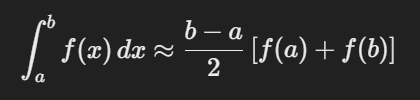

True Value of Integral is -2.44929359829471e-16


,Subintervals,Integral Value,Error
0,2,0.000000e+00,2.44929359829471e-16
1,4,-2.885506e-16,4.36212442287978e-17
2,6,-9.300983e-16,6.85168906306164e-16
3,8,-4.359836e-16,1.91054202421608e-16
4,10,-2.092721e-16,3.56572499489527e-17
5,12,-6.975737e-16,4.52644339772256e-16


[]

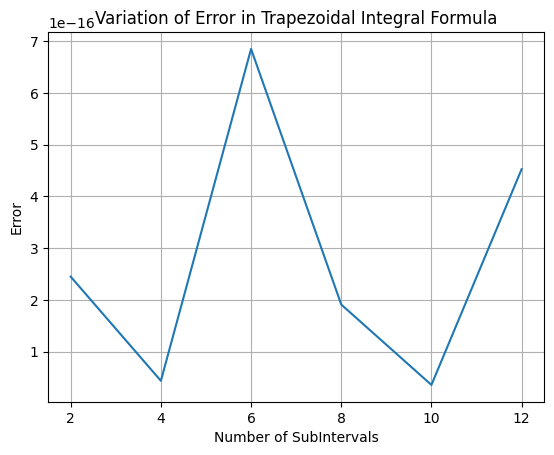

In [12]:
x = sp.symbols('x')
f_exp = sp.cos(x)
a = 0
b = 2 * np.pi
n_val = [2,4,6,8,10,12]
true_integral = exact_integral(f_exp,x,a,b)
error = []
trap_integral = []
data = []
for n in n_val:
    trap_i = trapezoidal(f_exp,x,n,a,b)
    trap_integral.append(trap_i)
    error.append(abs(trap_i - true_integral))
    data.append([n,trap_i,abs(trap_i - true_integral)])
df = pd.DataFrame(data,columns=['Subintervals','Integral Value','Error'])
print('True Value of Integral is',true_integral)
display(df)
plt.plot(n_val,error)
plt.grid(True)
plt.xlabel('Number of SubIntervals')
plt.ylabel('Error')
plt.title('Variation of Error in Trapezoidal Integral Formula')
plt.plot()

**Q6) Approximate the integral of f(x)=1/(1+x$^2$ )​ from x=0 to x=1 using Simpson’s
rule with 6 subintervals. Compare this with the actual value of the integral.**

**Simpson's Rule**
- Simpson's Rule provides a higher-order approximation by fitting a quadratic (parabolic) curve through three points and calculating the area under the parabola.
- Formula:<br>
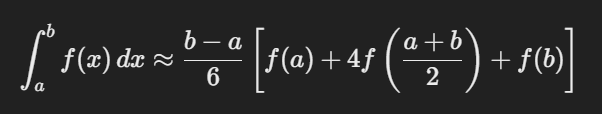

True Value of Integral is 0.785398163397448
Simspons Value of Integral is 0.7833333333333333
Error Value of Integral is 0.00206483006411495


,Subintervals,Integral Value,Error
0,2,0.783333,0.00206483006411495
1,4,0.785392,6.00653470317347e-6
2,6,0.785398,2.18163437537555e-7
3,8,0.785398,3.77827715780654e-8
4,10,0.785398,9.91264459404562e-9


[]

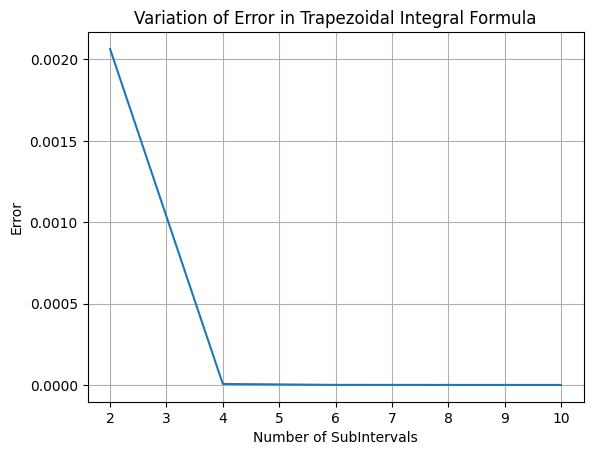

In [13]:
x = sp.symbols('x')
f_exp = 1/(1+x**2)
a = 0
b = 1
n_val = [2,4,6,8,10]
true_integral = exact_integral(f_exp,x,a,b)
error = []
sim_integral = []
data = []
for n in n_val:
    simpson_i = simpsons(f_exp,x,n,a,b)
    sim_integral.append(simpson_i)
    error.append(abs(simpson_i - true_integral))
    data.append([n,simpson_i,abs(simpson_i - true_integral)])
df = pd.DataFrame(data,columns=['Subintervals','Integral Value','Error'])
print('True Value of Integral is',true_integral)
print('Simspons Value of Integral is',sim_integral[0])
print('Error Value of Integral is',error[0])
display(df)
plt.plot(n_val,error)
plt.grid(True)
plt.xlabel('Number of SubIntervals')
plt.ylabel('Error')
plt.title('Variation of Error in Trapezoidal Integral Formula')
plt.plot()

**Q7) Use the composite trapezoidal rule and composite Simpson’s method to
approximate the integral of   from x=0 to x=1 with n subintervals. Compare plot
the values in one figure.**

**Composite Trapezoidal Rule**
- The Composite Trapezoidal Rule improves the basic Trapezoidal Rule by dividing the interval [a,b] into multiple smaller subintervals and applying the trapezoidal rule to each.
- Formula:<br>
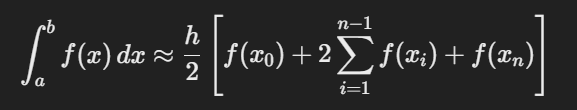
<br> where h=(b-a)/n

**Composite Simpson's Rule**
- The Composite Simpson's Rule applies Simpson's Rule over multiple subintervals to improve accuracy.
- Formula:<br>
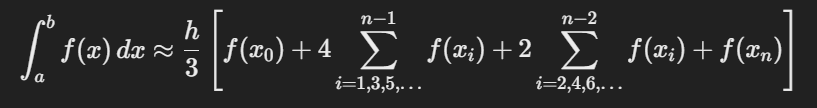
<br> where h=(b-a)/n

True Value of Integral is 0.746824132812427


,Subintervals,Integral Value for Trapezoidal,Trapzoidal Error,Integral Value for Simpsons,Simpsons Error
0,2,0.731370,0.0154538809838640,0.747180,0.000356296097083320
1,4,0.742984,0.00384003501204577,0.746855,3.12469785602731e-5
2,6,0.745119,0.00170472037624769,0.746830,6.25867691794735e-6
3,8,0.745866,0.000958517966731853,0.746826,1.98771503945316e-6
4,10,0.746211,0.000613336680677534,0.746825,8.15442016577350e-7
5,12,0.746398,0.000425884918986652,0.746825,3.93566767287190e-7


[]

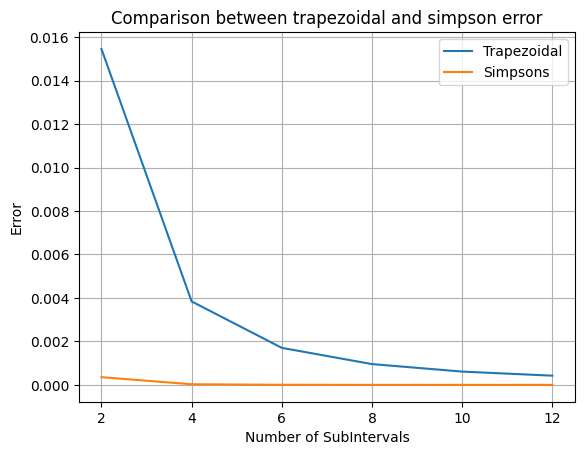

In [14]:
x = sp.symbols('x')
f_exp = sp.exp(-x**2)
a = 0
b = 1
n_val = [2,4,6,8,10,12]
true_integral = exact_integral(f_exp,x,a,b)
error_trap = []
error_sim = []
trap_integral = []
data = []
for n in n_val:
    trap_i = trapezoidal(f_exp,x,n,a,b)
    simpson_i = simpsons(f_exp,x,n,a,b)
    trap_integral.append(trap_i)
    error_trap.append(abs(trap_i - true_integral))
    error_sim.append(abs(simpson_i - true_integral))
    data.append([n,trap_i,abs(trap_i - true_integral),simpson_i,abs(simpson_i - true_integral)])
df = pd.DataFrame(data,columns=['Subintervals','Integral Value for Trapezoidal','Trapzoidal Error','Integral Value for Simpsons','Simpsons Error'])
print('True Value of Integral is',true_integral)
display(df)
plt.plot(n_val,error_trap,label = 'Trapezoidal')
plt.plot(n_val,error_sim,label = 'Simpsons')
plt.legend()
plt.grid(True)
plt.xlabel('Number of SubIntervals')
plt.ylabel('Error')
plt.title('Comparison between trapezoidal and simpson error')
plt.plot()